## Model Training

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import StandardScaler # Performing Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df=df.drop(labels=['id'],axis=1)

In [5]:
## Independent and dependent features
X = df.drop(labels=['price'],axis=1)
y = df[['price']]

In [6]:
y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [7]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [8]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [9]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median'))
    # ('scaler',StandardScaler())
    ]
)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    # ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [10]:
## Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [12]:
X_train.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.41,60.6,56.0,4.85,4.80,2.93,4.0,1.0,5.0
1,1.23,59.9,59.0,6.91,7.01,4.19,2.0,4.0,4.0
2,1.70,62.0,58.0,7.61,7.66,4.74,3.0,4.0,3.0
3,0.33,61.2,56.0,4.47,4.44,2.73,4.0,2.0,6.0
4,0.33,62.1,58.0,4.41,4.45,2.75,2.0,5.0,2.0


In [13]:
y_train.isna().sum()

,0
price,0


In [14]:
## Model Training
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
regression.coef_

array([[13871.42913989,  -122.47972005,   -36.74294478, -1530.98012742,
         -447.54630307,  -110.40598779,    69.2043578 ,  -286.18088461,
          434.4886456 ]])

In [16]:
regression.intercept_

array([13586.52159977])

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
## Train multiple models
## Model Evaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)

    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 1014.6296630375483
MAE: 675.0758270068294
R2 score 93.62906819996046


Lasso
Model Training Performance
RMSE: 1014.8222891431418
MAE: 677.253957251942
R2 score 93.62664894430837


Ridge
Model Training Performance
RMSE: 1014.6427916198226
MAE: 675.2220799717154
R2 score 93.62890332829056


Elasticnet
Model Training Performance
RMSE: 1665.8217830811604
MAE: 1147.634356293002
R2 score 82.82704942956914




In [28]:
!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00


In [29]:
## Train multiple models
## Model Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),  # Adjust alpha for Lasso regularization
    'Ridge': Ridge(alpha=1.0),  # Adjust alpha for Ridge regularization
    'Elastic Net': ElasticNet(alpha=0.5, l1_ratio=0.5),  # Adjust alpha and l1_ratio for ElasticNet
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100),  # Adjust n_estimators for Random Forest
    'XGBoost': XGBRegressor(n_estimators=100,tree_method="hist", device="cuda"),  # Adjust n_estimators for XGBoost
    'CatBoost': CatBoostRegressor()  # Adjust iterations, depth, and learning_rate for CatBoost
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)

    print('='*35)
    print('\n')


Linear Regression
Model Training Performance
RMSE: 1014.6296630375483
MAE: 675.0758270068294
R2 score 93.62906819996046




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.341e+08, tolerance: 2.212e+08
  model = cd_fast.enet_coordinate_descent(


Lasso
Model Training Performance
RMSE: 1014.6107198647499
MAE: 675.2664829586082
R2 score 93.62930608879768


Ridge
Model Training Performance
RMSE: 1014.6427916198226
MAE: 675.2220799717154
R2 score 93.62890332829056


Elastic Net
Model Training Performance
RMSE: 1563.1246696943217
MAE: 1138.148066064636
R2 score 84.87918914665758


Decision Tree Regressor
Model Training Performance
RMSE: 854.98223086599
MAE: 427.1559386049501
R2 score 95.47621429454021




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model Training Performance
RMSE: 611.8275838162871
MAE: 309.79471852822724
R2 score 97.68342720348417


XGBoost
Model Training Performance
RMSE: 587.8912585153012
MAE: 297.25053456210946
R2 score 97.86114249749754


Learning rate set to 0.088926
0:	learn: 3713.5182570	total: 67ms	remaining: 1m 6s
1:	learn: 3421.2448249	total: 83.2ms	remaining: 41.5s
2:	learn: 3148.9662871	total: 110ms	remaining: 36.5s
3:	learn: 2899.3954170	total: 125ms	remaining: 31.2s
4:	learn: 2668.9586936	total: 141ms	remaining: 28s
5:	learn: 2467.2560435	total: 156ms	remaining: 25.9s
6:	learn: 2281.0118247	total: 172ms	remaining: 24.4s
7:	learn: 2115.0812433	total: 187ms	remaining: 23.2s
8:	learn: 1961.4089156	total: 203ms	remaining: 22.3s
9:	learn: 1825.7519859	total: 218ms	remaining: 21.6s
10:	learn: 1700.4116436	total: 233ms	remaining: 21s
11:	learn: 1589.7271968	total: 248ms	remaining: 20.4s
12:	learn: 1490.1055727	total: 264ms	remaining: 20s
13:	learn: 1398.5824498	total: 281ms	remaini

In [40]:
trained_model_list=[]
model_list=[]
r2_list=[]
param_grid_lasso = {'alpha': [0.1, 0.5, 1.0]}
param_grid_ridge = {'alpha': [0.1, 0.5, 1.0]}
param_grid_enet = {'alpha': [0.1, 0.5, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]}
param_grid_dt = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
# param_grid_rf = {
#     'n_estimators': [100, 150],
#     'max_depth': [5, 10],
#     'min_samples_split': [2, 5],
# }
param_grid_xgb = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.05, 0.01]}
param_grid_cb = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500],
}

# Perform grid search for each model
models = {
    'Lasso': GridSearchCV(Lasso(), param_grid=param_grid_lasso, cv=5),
    'Ridge': GridSearchCV(Ridge(), param_grid=param_grid_ridge, cv=5),
    'Elastic Net': GridSearchCV(ElasticNet(), param_grid=param_grid_enet, cv=5),
    'Decision Tree Regressor': GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid_dt, cv=5),
    # 'Random Forest Regressor': RandomizedSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, n_iter=10),
    'XGBoost': GridSearchCV(XGBRegressor(tree_method="hist", device="cuda"), param_grid_xgb, cv=5),
    'CatBoost': RandomizedSearchCV(
    CatBoostRegressor(task_type= "GPU"),
    param_distributions=param_grid_cb,
    n_iter=2,
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model performance
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)

    # Access best parameters and score
    best_params = model.best_params_
    best_score = model.best_score_
    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Score: {best_score:.4f}")
    print('='*35)
    print('\n')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.904e+08, tolerance: 1.770e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.200e+08, tolerance: 1.771e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.308e+09, tolerance: 1.766e

Lasso
Model Training Performance
RMSE: 1014.8222891431418
MAE: 677.253957251942
R2 score 93.62664894430837
Best Parameters: {'alpha': 1.0}
Best Cross-Validation Score: 0.9368


Ridge
Model Training Performance
RMSE: 1014.6427916198226
MAE: 675.2220799717154
R2 score 93.62890332829056
Best Parameters: {'alpha': 1.0}
Best Cross-Validation Score: 0.9367


Elastic Net
Model Training Performance
RMSE: 1327.172188662095
MAE: 1002.7230043801774
R2 score 89.09960110911017
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}
Best Cross-Validation Score: 0.8917


Decision Tree Regressor
Model Training Performance
RMSE: 686.5248050578402
MAE: 380.735948882922
R2 score 97.08324256750306
Best Parameters: {'max_depth': 7, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9704


XGBoost
Model Training Performance
RMSE: 577.1832628943132
MAE: 295.19844233850125
R2 score 97.93834826347432
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}
Best Cross-Validation Score: 0.9796


In [41]:
import joblib

# After selecting the best model based on your evaluation criteria (e.g., highest R2 score)
best_model_name = list(models.keys())[r2_list.index(max(r2_list))]  # Get name of best model
best_model = models[best_model_name]  # Get the best model object

# Save the best model to a pickle file
joblib.dump(best_model, 'best_diamond_price_model.pkl')  # Replace with your desired filename

print(f"Best model '{best_model_name}' saved successfully!")

Best model 'XGBoost' saved successfully!


In [42]:
models

{'Lasso': GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 0.5, 1.0]}),
 'Ridge': GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 0.5, 1.0]}),
 'Elastic Net': GridSearchCV(cv=5, estimator=ElasticNet(),
              param_grid={'alpha': [0.1, 0.5, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]}),
 'Decision Tree Regressor': GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [3, 5, 7],
                          'min_samples_split': [2, 5, 10]}),
 'XGBoost': GridSearchCV(cv=5,
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                

In [43]:
r2_list

[0.9362664894430838,
 0.9362890332829057,
 0.8909960110911017,
 0.9708324256750307,
 0.9793834826347432,
 0.9783234082508132]

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# # Linear Regression
# # Model Training Performance
# # RMSE: 1013.9047094344002
# # MAE: 674.025511579685
# # R2 score 93.68908248567512
# # Best Parameters: {'fit_intercept': True}
# # Best Cross-Validation Score: 0.9361
# # ===================================


# # /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.972e+09, tolerance: 1.763e+08
# #   model = cd_fast.enet_coordinate_descent(
# # Lasso
# # Model Training Performance
# # RMSE: 1013.8784226767013
# # MAE: 675.0716923362156
# # R2 score 93.68940971841704
# # Best Parameters: {'alpha': 1.0}
# # Best Cross-Validation Score: 0.9364
# # ===================================


# # Ridge
# # Model Training Performance
# # RMSE: 1013.9059272771406
# # MAE: 674.0555800798531
# # R2 score 93.68906732505968
# # Best Parameters: {'alpha': 1.0}
# # Best Cross-Validation Score: 0.9361
# # ===================================


# # Elastic Net
# # Model Training Performance
# # RMSE: 1102.9696125940243
# # MAE: 792.2183842301247
# # R2 score 92.53163872491427
# # Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}
# # Best Cross-Validation Score: 0.9249
# # ===================================


# # Decision Tree Regressor
# # Model Training Performance
# # RMSE: 689.3625545010212
# # MAE: 382.27702404283673
# # R2 score 97.08261596647614
# # Best Parameters: {'max_depth': 7, 'min_samples_split': 5}
# # Best Cross-Validation Score: 0.9705
# # ===================================
# # XGBoost
# # Model Training Performance
# # RMSE: 579.0457783161585
# # MAE: 295.61078981283134
# # R2 score 97.92502128804279
# # Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
# # Best Cross-Validation Score: 0.9795
# # ===================================
# # Epoch 100/100
# # 3388/3388 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 350677.1875 - mae: 315.0822 - val_loss: 386844.9062 - val_mae: 322.9169
# # 1815/1815 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
# # Model Performance:
# # MAE: 314.99
# # RMSE: 598.76
# # R-squared: 0.9778
# W/o scaler
# Linear Regression
# Model Training Performance
# RMSE: 1014.6296630375483
# MAE: 675.0758270068294
# R2 score 93.62906819996046
# Best Parameters: {'fit_intercept': True}
# Best Cross-Validation Score: 0.9367
# ===================================


# /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.904e+08, tolerance: 1.770e+08
#   model = cd_fast.enet_coordinate_descent(
# /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.200e+08, tolerance: 1.771e+08
#   model = cd_fast.enet_coordinate_descent(
# /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.308e+09, tolerance: 1.766e+08
#   model = cd_fast.enet_coordinate_descent(
# Lasso
# Model Training Performance
# RMSE: 1014.8222891431418
# MAE: 677.253957251942
# R2 score 93.62664894430837
# Best Parameters: {'alpha': 1.0}
# Best Cross-Validation Score: 0.9368
# ===================================


# Ridge
# Model Training Performance
# RMSE: 1014.6427916198226
# MAE: 675.2220799717154
# R2 score 93.62890332829056
# Best Parameters: {'alpha': 1.0}
# Best Cross-Validation Score: 0.9367
# ===================================


# Elastic Net
# Model Training Performance
# RMSE: 1327.172188662095
# MAE: 1002.7230043801774
# R2 score 89.09960110911017
# Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}
# Best Cross-Validation Score: 0.8917
# ===================================


# Decision Tree Regressor
# Model Training Performance
# RMSE: 686.5554299994752
# MAE: 380.7579352606822
# R2 score 97.08298233650247
# Best Parameters: {'max_depth': 7, 'min_samples_split': 2}
# Best Cross-Validation Score: 0.9704
# ===================================


In [46]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [47]:
gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   tf.config.experimental.set_memory_growth(gpus[0], True)

model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
with tf.device('/gpu:0'):
  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3388/3388 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 17121874.0000 - mae: 2919.9138 - val_loss: 2900457.0000 - val_mae: 1168.5992
Epoch 2/100
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1951359.8750 - mae: 936.1810 - val_loss: 760508.6875 - val_mae: 485.3112
Epoch 3/100
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 646611.5625 - mae: 473.2946 - val_loss: 730944.6875 - val_mae: 472.7965
Epoch 4/100
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 621915.6875 - mae: 467.1354 - val_loss: 715431.8750 - val_mae: 458.3227
Epoch 5/100
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 597775.5000 - mae: 447.7750 - val_loss: 695523.0000 - val_mae: 436.3982
Epoch 6/100
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 578460.5000 - mae: 431.6697 - val_loss: 693906.2500 - val_mae: 435.9932
Epoch 7/100
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 560069.9375 - mae: 425.1507 - val_loss: 688612.1250 - val_mae: 430.6552
Epoch 8/100
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - 

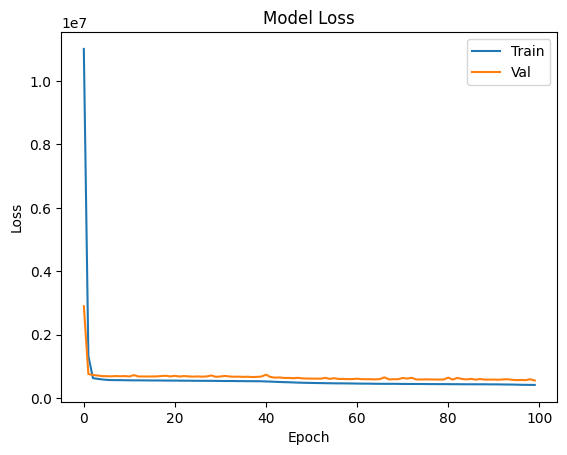

In [48]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()